# DAT-NYC-37 | Codealong 05 | Inferential Statistics for Model Fit 

## Inferential Statistics | Motivating Example

In [22]:
import os # internal package used by Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # new tool for today
import seaborn as sns # review what seaborn is/does

#setting default options for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot') # ggplot is used in R

In [23]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05-start.csv'), index_col = 'ID')

We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

In [24]:
df.head(2)

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379


### Exploratory Analysis on `M1` and `M2` and how they relate to `SalePrice`

In [25]:
print df.columns # showing the columns to predict drivers of sale. What do M1 and M2 mean/do?

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'BedCount',
       u'BathCount', u'Size', u'LotSize', u'BuiltInYear', u'M1', u'M2'],
      dtype='object')


#### Correlation

In [26]:
df[ ['M1', 'M2', 'SalePrice'] ].corr() # showing only correlation of few variables (pass columns as list)
#df.corr() showing a matrix of all the variable correlations

,M1,M2,SalePrice
M1,1.000000,0.166624,0.970612
M2,0.166624,1.000000,0.022003
SalePrice,0.970612,0.022003,1.000000


#### Scatter plots

(0, 20)

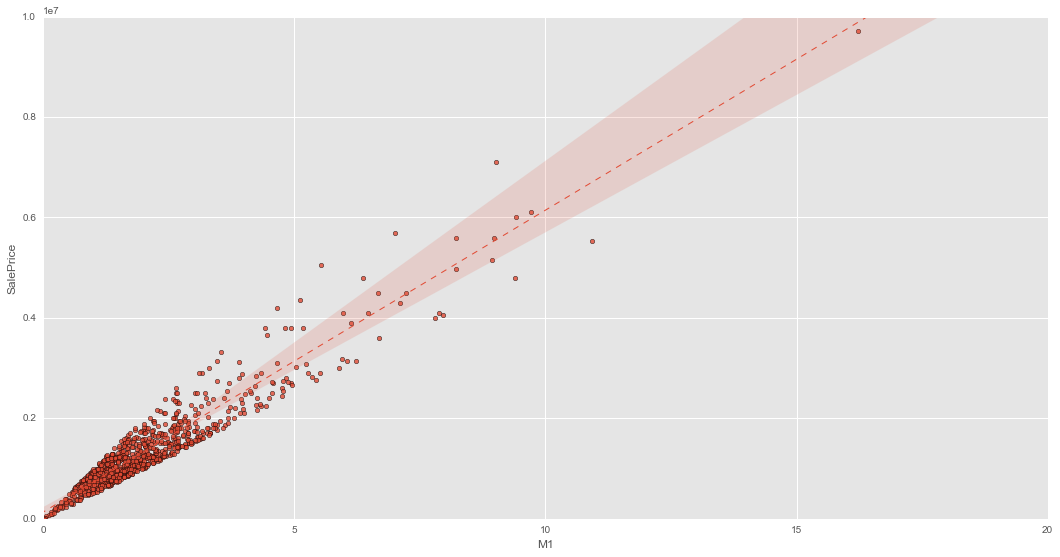

In [27]:
# We can also use df.plot for plotting:
# df.plot(kind = 'scatter', x = 'M1', y = 'SalePrice', s = 100, figsize = (8, 8))

plt.figure(figsize=(18, 9))
axes = sns.regplot(data=df, # Dataframe to use (required)
            x='M1',  # Dataframe column name for x-axis (required)
            y='SalePrice', # Dataframe column name for y-axis (required)
            line_kws={'linestyle':'--', 'linewidth': 1},  # Additional plot arguments
            scatter_kws={'linewidth': 0.5, 'edgecolor': "black"})

axes.set_ylim(0, 1e7)
axes.set_xlim(0, 20);

# See: https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html for more details on regression plot

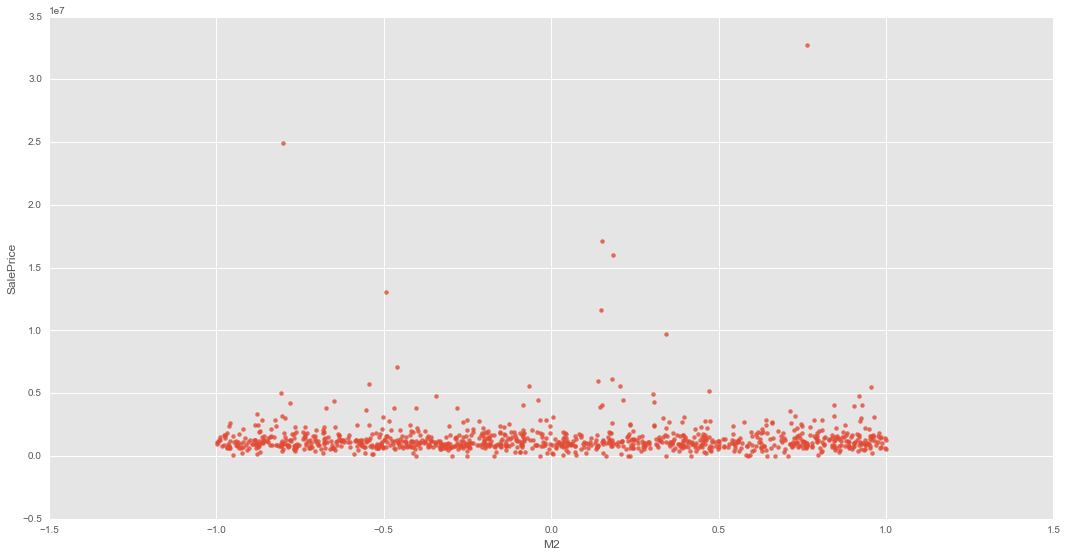

In [28]:
# df.plot(kind = 'scatter', x = 'M2', y = 'SalePrice', s = 100, figsize = (8, 8));
plt.figure(figsize=(18, 9))
sns.regplot(data=df, x='M2', y='SalePrice', fit_reg=False)

### Your first Machine Learning Models!

#### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [29]:
X = df[ ['M1'] ]
y = df.SalePrice

model = smf.OLS(y, X).fit()


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:02:03   Log-Likelihood:                -14393.
No. Observations:                1000   AIC:                         2.879e+04
Df Residuals:                     999   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M1          6.241e+05   3894.990    160.228      0.000      6.16e+05  6.32e+05
==============================================================================
Omnibus:                     1044.296   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901486.247
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                     149.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [31]:
X = df[ ['M2'] ]
y = df.SalePrice

model = smf.OLS(y, X).fit()

MSE (Mean Square Area) will be relatively large if the line is not a good fit. MSE = sum of abs(e_i)
- we can compare how well the model line fits the data compared to the mean value (taking various 
    - this we call R^2
        - 1 = perfect fit
        - 0 = no fit
    - R = MSE / sum(y_i - y_bar)^2 
        - = 1 - sum(y_i - y_hat)^2/sum(y_i - y_bar)^2 # why is this squared? to penalize outliers

In [32]:
df['SalePrice']

ID
15063471       710000.0
15063505      2150000.0
15063609      5600000.0
15064044      1500000.0
15064257       970000.0
                ...    
2124214951     390000.0
2126960082     860000.0
2128308939     830000.0
2131957929     835000.0
2136213970     825000.0
Name: SalePrice, dtype: float64

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Wed, 15 Jun 2016   Prob (F-statistic):              0.792
Time:                        20:02:03   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

95% conf int = if I take 100 samples, 95 of those samples will feature a coefficient between [-2.06e+5, 2.7e+5]
p - value = if we sample the data again, how likely we are to get the same features